## Akhilesh Pant (AU FTCA: MCA)

In [18]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from PIL import Image  # For verifying image files

# Set paths for dataset
TRAIN_DIR = 'dataset/train'  # Update this to your actual training dataset path
VALID_DIR = 'dataset/valid'  # Update this to your actual validation dataset path
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Verify dataset directories exist
if not os.path.exists(TRAIN_DIR) or not os.path.exists(VALID_DIR):
    raise FileNotFoundError("The specified TRAIN_DIR or VALID_DIR path does not exist. Please check the paths.")

# Automatically determine class names based on subdirectories
CLASSES = sorted(os.listdir(TRAIN_DIR))
NUM_CLASSES = len(CLASSES)

print(f"Detected classes: {CLASSES}")

# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    TRAIN_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    VALID_DIR,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

# Load ResNet50 model for transfer learning
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
x = Dense(NUM_CLASSES, activation='softmax')(x)  # Match the number of output neurons to NUM_CLASSES

# Create the final model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
EPOCHS = 10
history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=EPOCHS
)

# Save the model using the recommended Keras format
model.save('image_classifier_model.keras')

# Function for prediction
def predict_image(image_path):
    from tensorflow.keras.preprocessing.image import load_img, img_to_array
    import numpy as np

    if not os.path.exists(image_path):
        raise FileNotFoundError(f"The image at path '{image_path}' does not exist. Please check the path.")

    # Validate image file format using PIL
    try:
        with Image.open(image_path) as img:
            img.verify()  # Check if the image file is valid
    except Exception as e:
        raise ValueError(f"Invalid image file: {image_path}. Error: {str(e)}")

    # Load and preprocess the image
    image = load_img(image_path, target_size=IMAGE_SIZE)
    image = img_to_array(image)
    image = image / 255.0  # Normalize pixel values
    image_tensor = np.expand_dims(image, axis=0)  # Add batch dimension

    # Make a prediction
    prediction = model.predict(image_tensor, verbose=0)
    class_index = tf.argmax(prediction[0]).numpy()  # Get the predicted class index
    return CLASSES[class_index]

# Example usage
image_path = 'Images/dog9.jpg'  # Replace with the path to your image
if os.path.exists(image_path):
    try:
        result = predict_image(image_path)
        print(f"The image is classified as: {result}")
    except ValueError as e:
        print(e)
else:
    print(f"Image not found at path: {image_path}")


Detected classes: ['.ipynb_checkpoints', 'Cat', 'Dog', 'Person']
Found 12 images belonging to 4 classes.
Found 16 images belonging to 4 classes.
Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 24s 24s/step - accuracy: 0.3333 - loss: 1.2400 - val_accuracy: 0.3125 - val_loss: 13.0058
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 11.3394 - val_accuracy: 0.3125 - val_loss: 25.7591
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 25.7525 - val_accuracy: 0.3750 - val_loss: 13.0925
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.5000 - loss: 13.9740 - val_accuracy: 0.3750 - val_loss: 19.5908
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 20.2508 - val_accuracy: 0.3750 - val_loss: 17.4525
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 18.0778 - val_accuracy: 0.3750 - val_loss: 10.0615
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 0.3333 - loss: 10.0825 - val_accuracy: 0.4375

## Displaying Images/dog9.jpg

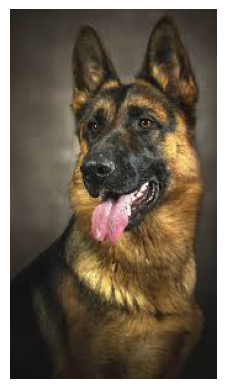

In [16]:
## Dispaying the Picture
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load and display the image
image_path = "Images/dog9.jpg"  # Replace with the path to your image
img = mpimg.imread(image_path)

plt.imshow(img)
plt.axis('off')  # Hide the axes
plt.show()